# Exploratory data analysis

## 1. pandas line plots
In the previous chapter, you saw that the .plot() method will place the Index values on the x-axis by default. In this exercise, you'll practice making line plots with specific columns on the x and y axes.

You will work with a dataset consisting of monthly stock prices in 2015 for AAPL, GOOG, and IBM. The stock prices were obtained from Yahoo Finance. Your job is to plot the 'Month' column on the x-axis and the AAPL and IBM prices on the y-axis using a list of column names.

All necessary modules have been imported for you, and the DataFrame is available in the workspace as df. Explore it using methods such as .head(), .info(), and .describe() to see the column names.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [107]:
stock = pd.read_csv("datasets/messy_stock_data.tsv", header= 3, sep = " ", comment="#")
stock

,name,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,IBM,156.08,160.01,159.81,165.22,172.25,167.15,164.75,152.77,145.36,146.11,137.21,137.96
1,MSFT,45.51,43.08,42.13,43.47,47.53,45.96,45.61,45.51,43.56,48.70,53.88,55.40
2,GOOGLE,512.42,537.99,559.72,540.50,535.24,532.92,590.09,636.84,617.93,663.59,735.39,755.35
3,APPLE,110.64,125.43,125.97,127.29,128.76,127.81,125.34,113.39,112.80,113.36,118.16,111.73


In [115]:
# Transpose the dataframe
stock_t = stock.T
stock_t

,0,1,2,3
name,IBM,MSFT,GOOGLE,APPLE
Jan,156.08,45.51,512.42,110.64
Feb,160.01,43.08,537.99,125.43
Mar,159.81,42.13,559.72,125.97
Apr,165.22,43.47,540.5,127.29
May,172.25,47.53,535.24,128.76
Jun,167.15,45.96,532.92,127.81
Jul,164.75,45.61,590.09,125.34
Aug,152.77,45.51,636.84,113.39
Sep,145.36,43.56,617.93,112.8


In [116]:
# Rename the header as the first row
stock_t.rename(columns=stock_t.iloc[0], inplace= True)

# Drop the name row
stock_t.drop("name", inplace=True)

stock_t

,IBM,MSFT,GOOGLE,APPLE
Jan,156.08,45.51,512.42,110.64
Feb,160.01,43.08,537.99,125.43
Mar,159.81,42.13,559.72,125.97
Apr,165.22,43.47,540.5,127.29
May,172.25,47.53,535.24,128.76
Jun,167.15,45.96,532.92,127.81
Jul,164.75,45.61,590.09,125.34
Aug,152.77,45.51,636.84,113.39
Sep,145.36,43.56,617.93,112.8
Oct,146.11,48.7,663.59,113.36


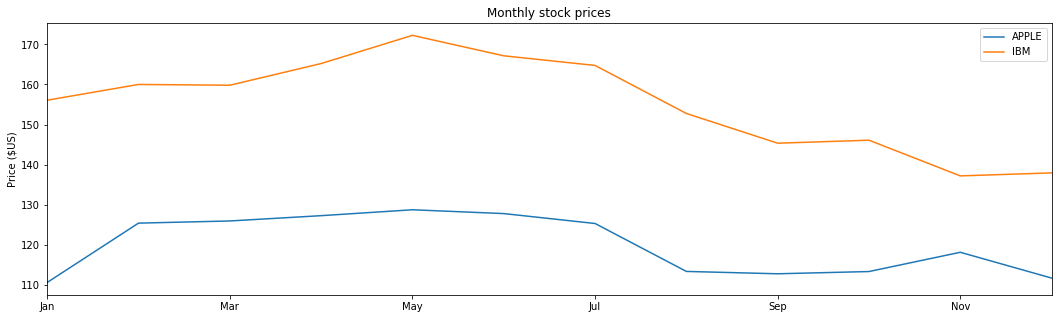

In [154]:
# Create a list of y-axis column names: y_columns
y_columns = ["APPLE", "IBM"]

# Generate a line plot
stock_t.plot (y = y_columns, figsize=(18, 5))

# Add the title
plt.title('Monthly stock prices')

# Add the y-axis label
plt.ylabel('Price ($US)')

# Display the plot
plt.show()

Wonderful work! It looks like the monthly stock prices of both AAPL and IBM peaked early in the year before falling.

## 2. pandas scatter plots
Pandas scatter plots are generated using the kind='scatter' keyword argument. Scatter plots require that the x and y columns be chosen by specifying the x and y parameters inside .plot(). Scatter plots also take an s keyword argument to provide the radius of each circle to plot in pixels.

In this exercise, you're going to plot fuel efficiency (miles-per-gallon) versus horse-power for 392 automobiles manufactured from 1970 to 1982 from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Auto+MPG).

The size of each circle is provided as a NumPy array called sizes. This array contains the normalized 'weight' of each automobile in the dataset.

In [76]:
fuel = pd.read_csv("datasets/auto-mpg.csv")
fuel.tail()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
387,27.0,4,140.0,86,2790,15.6,82,US,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,Europe,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,US,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,US,ford ranger
391,31.0,4,119.0,82,2720,19.4,82,US,chevy s-10


Fantastic! As you would expect, automobiles with higher horsepower are less fuel efficient.

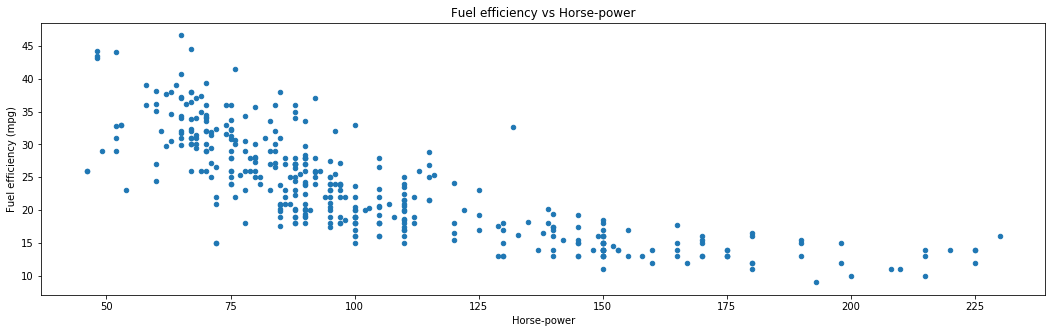

In [153]:
# Generate a scatter plot
fuel.plot(kind="scatter", x='hp', y='mpg', figsize=(18, 5))

# Add the title
plt.title('Fuel efficiency vs Horse-power')

# Add the x-axis label
plt.xlabel('Horse-power')

# Add the y-axis label
plt.ylabel('Fuel efficiency (mpg)')

# Display the plot
plt.show()

## 3. pandas box plots
While pandas can plot multiple columns of data in a single figure, making plots that share the same x and y axes, there are cases where two columns cannot be plotted together because their units do not match. The .plot() method can generate subplots for each column being plotted. Here, each plot will be scaled independently.

In this exercise your job is to generate box plots for fuel efficiency (mpg) and weight from the automobiles data set. To do this in a single figure, you'll specify subplots=True inside .plot() to generate two separate plots.

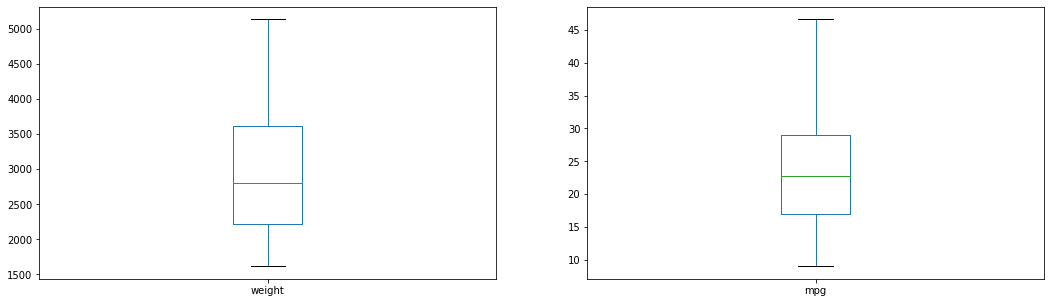

In [152]:
# Make a list of the column names to be plotted: cols
cols = ["weight", "mpg"]

# Generate the box plots
fuel[cols].plot(kind = "box",subplots=True, figsize=(18, 5))

# Display the plot
plt.show()

Excellent job! Box plots are a great way to visualize important summary statistics.

## 4. pandas hist, pdf and cdf
Pandas relies on the .hist() method to not only generate histograms, but also plots of probability density functions (PDFs) and cumulative density functions (CDFs).

In this exercise, you will work with a dataset consisting of restaurant bills that includes the amount customers tipped.

The original dataset is provided by the [Seaborn package](https://github.com/mwaskom/seaborn-data/blob/master/tips.csv).

Your job is to plot a PDF and CDF for the fraction column of the tips dataset. This column contains information about what fraction of the total bill is comprised of the tip.

Remember, when plotting the PDF, you need to specify normed=True in your call to .hist(), and when plotting the CDF, you need to specify cumulative=True in addition to normed=True.

In [155]:
tips = pd.read_csv("datasets/tips.csv")
tips.tail()

,total_bill,tip,sex,smoker,day,time,size,fraction
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204
243,18.78,3.00,Female,No,Thur,Dinner,2,0.159744


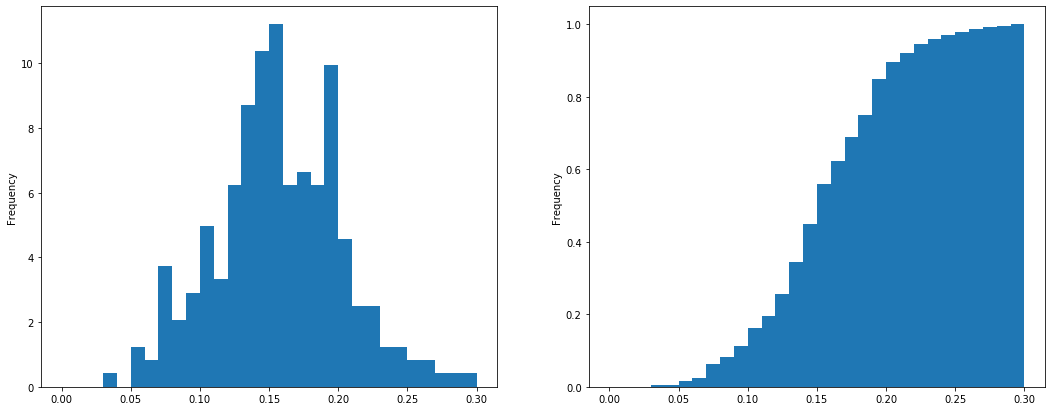

In [175]:
# This formats the plots such that they appear on separate rows
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 7))

# Plot the PDF
tips.fraction.plot(ax=axes[0], kind='hist', density=True, bins=30, range=(0,.3))

# Plot the CDF
tips.fraction.plot(ax = axes[1], kind="hist", cumulative=True, bins=30, density=True, range=(0,.3))

plt.show()

## 5. Bachelor's degrees awarded to women
In this exercise, you will investigate statistics of the percentage of Bachelor's degrees awarded to women from 1970 to 2011. Data is recorded every year for 17 different fields. This data set was obtained from the [Digest of Education Statistics](http://nces.ed.gov/programs/digest/2013menu_tables.asp).

Your job is to compute the minimum and maximum values of the 'Engineering' column and generate a line plot of the mean value of all 17 academic fields per year. To perform this step, you'll use the .mean() method with the keyword argument axis='columns'. This computes the mean across all columns per row.

In [24]:
# Load the data with index set to year
degree = pd.read_csv("datasets/percent-bachelors-degrees-women-usa.csv", index_col="Year")

In [32]:
print(degree.tail())

      Agriculture  Architecture  Art and Performance    Biology   Business  \
Year                                                                         
2007    47.605026     43.100459                 61.4  59.411993  49.000459   
2008    47.570834     42.711730                 60.7  59.305765  48.888027   
2009    48.667224     43.348921                 61.0  58.489583  48.840474   
2010    48.730042     42.066721                 61.3  59.010255  48.757988   
2011    50.037182     42.773438                 61.2  58.742397  48.180418   

      Communications and Journalism  Computer Science  Education  Engineering  \
Year                                                                            
2007                           62.5              17.6  78.721413         16.8   
2008                           62.4              17.8  79.196327         16.5   
2009                           62.8              18.1  79.532909         16.8   
2010                           62.5             

In [13]:
# Print the minimum value of the Engineering column
degree["Engineering"].min()

0.8

In [14]:
# Print the maximum value of the Engineering column
degree["Engineering"].max()

19.0

In [89]:
# Construct the mean percentage per year: mean
mean = degree.mean(axis = "columns")

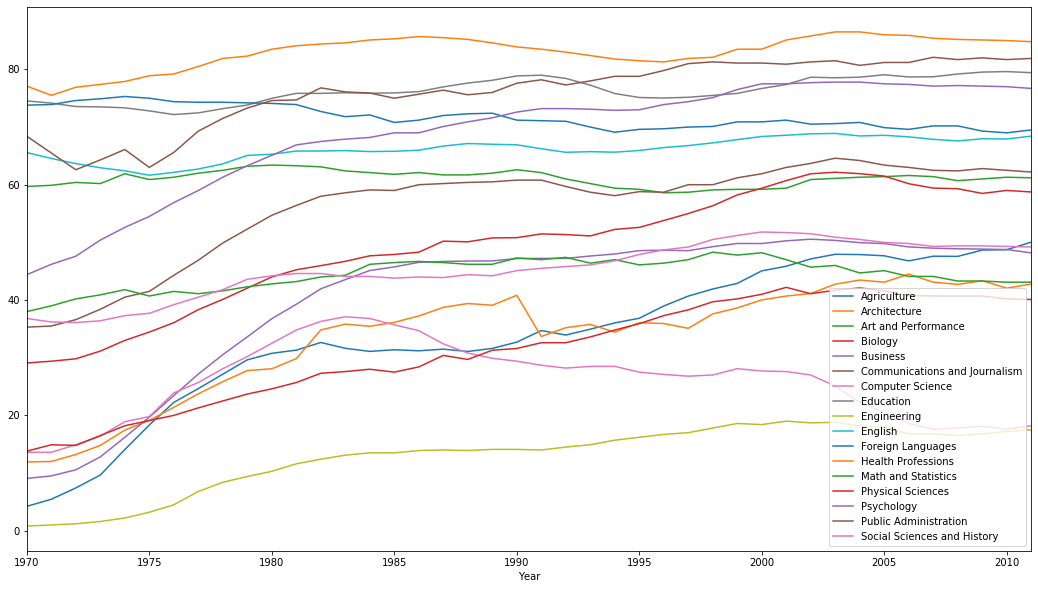

In [22]:
# Plot the degrees award per year per field
degree.plot(figsize=(18, 10));

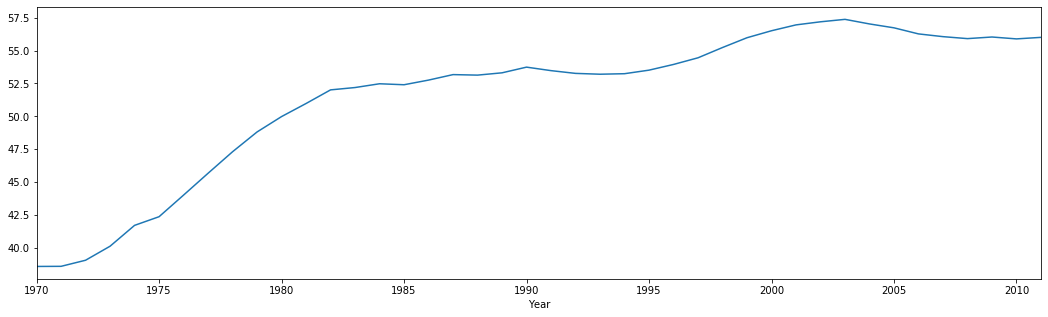

In [23]:
# Plot the average percentage per year
mean.plot(figsize=(18, 5));

Well done! It looks like there has generally been an upward trend since 1970.

## 6. Median vs mean
In many data sets, there can be large differences in the mean and median value due to the presence of outliers.

In this exercise, you'll investigate the mean, median, and max fare prices paid by passengers on the Titanic and generate a box plot of the fare prices. This data set was obtained from [Vanderbilt University](http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic.html).

In [25]:
titanic = pd.read_csv("datasets/titanic.csv")

In [26]:
titanic.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [34]:
# Print summary statistics of the fare column with .describe()
titanic["fare"].describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: fare, dtype: float64

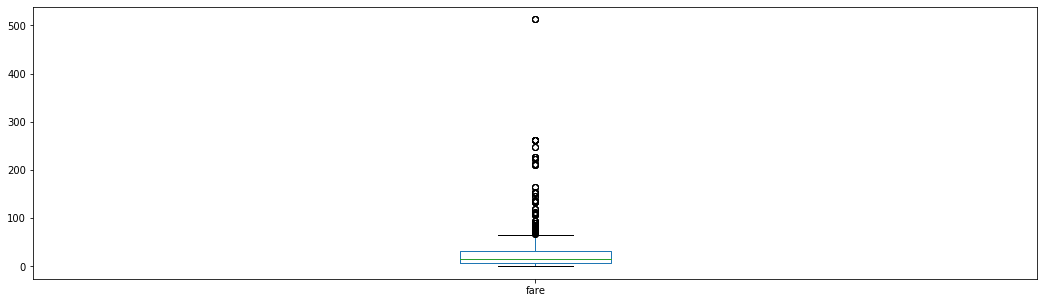

In [44]:
# Generate a box plot of the fare column
titanic.fare.plot(kind="box",figsize=(18, 5))

# Show the plot
plt.show()

Excellent job! Here you can see why the median is a more informative statistic in the presence of outliers.

## 7. Quantiles
In this exercise, you'll investigate the probabilities of life expectancy in countries around the world. This dataset contains life expectancy for persons born each year from 1800 to 2015. Since country names change or results are not reported, not every country has values. This dataset was obtained from [Gapminder](https://docs.google.com/a/continuum.io/spreadsheets/d/1dgOdlUEq6_V55OHZCxz5BG_0uoghJTeA6f83br5peNs/pub?range=A1:D70&gid=1&output=html#).

First, you will determine the number of countries reported in 2015. There are a total of 260 unique countries in the entire dataset. Then, you will compute the 5th and 95th percentiles of life expectancy over the entire dataset. Finally, you will make a box plot of life expectancy every 50 years from 1800 to 2000. Notice the large change in the distributions over this period.

In [45]:
life = pd.read_csv("datasets/life_expectancy_at_birth.csv")

In [46]:
life.tail()

,Unnamed: 0,Life expectancy,1800,1801,1802,1803,1804,1805,1806,1807,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
255,255,Yugoslavia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
256,256,Zambia,32.60,32.60,32.60,32.60,32.60,32.60,32.60,32.60,...,49.0,51.1,52.3,53.1,53.7,54.7,55.6,56.3,56.7,57.10
257,257,Zimbabwe,33.70,33.70,33.70,33.70,33.70,33.70,33.70,33.70,...,46.4,47.3,48.0,49.1,51.6,54.2,55.7,57.0,59.3,61.69
258,258,Åland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
259,259,South Sudan,26.67,26.67,26.67,26.67,26.67,26.67,26.67,26.67,...,55.5,55.6,55.8,56.0,55.9,56.0,56.0,56.1,56.1,56.10


In [47]:
# Print the number of countries reported in 2015
life["2015"].count()

208

In [48]:
# Print the 5th and 95th percentiles
life.quantile([0.05, 0.95])

,Unnamed: 0,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0.05,12.95,25.40,25.30,25.20,25.2,25.2,25.40,25.40,25.40,25.3,...,53.07,53.60,54.235,54.935,55.97,56.335,56.705,56.87,57.855,59.2555
0.95,246.05,37.92,37.35,38.37,38.0,38.3,38.37,38.37,38.37,38.0,...,80.73,80.93,81.200,81.365,81.60,81.665,81.830,82.00,82.100,82.1650


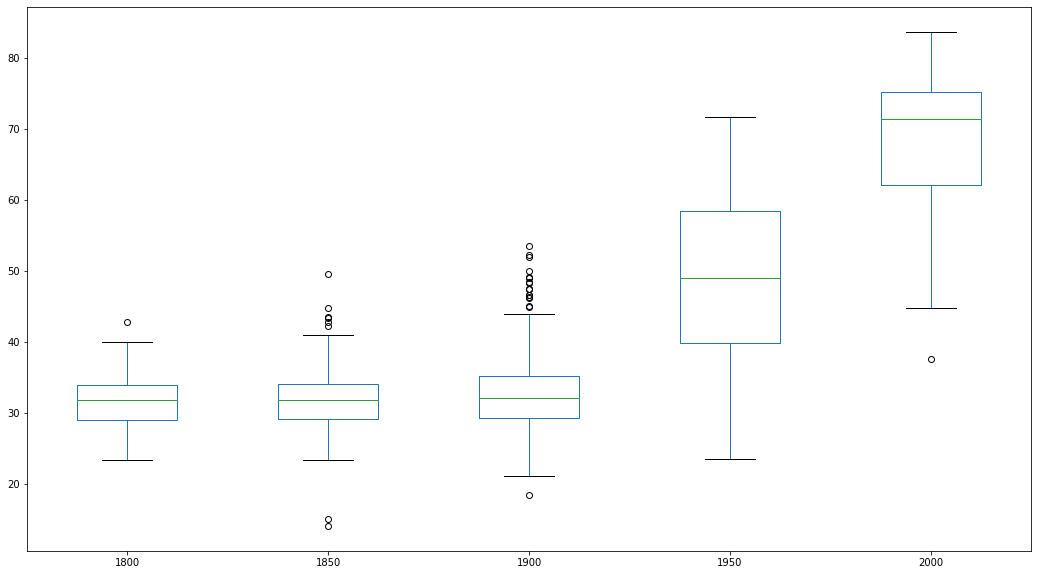

In [52]:
# Generate a box plot
years = ['1800','1850','1900','1950','2000']
life[years].plot(kind='box', figsize=(18, 10))
plt.show()

Fantastic work! It looks like overall, life expectancy has steadily increased since 1900.

## 8. Standard deviation of temperature
Let's use the mean and standard deviation to explore differences in temperature distributions in Pittsburgh in 2013. The data has been obtained from Weather Underground.

In this exercise, you're going to compare the distribution of daily temperatures in January and March. You'll compute the mean and standard deviation for these two months. You will notice that while the mean values are similar, the standard deviations are quite different, meaning that one month had a larger fluctuation in temperature than the other.

Load the dataframe which contains the January data, and march, which contains the March data.

In [60]:
weather = pd.read_csv("datasets/weather_data_austin_2010.csv", parse_dates=True, index_col="Date")

In [61]:
weather.tail()

,Temperature,DewPoint,Pressure
Date,,,
2010-12-31 19:00:00,51.1,38.1,1.0
2010-12-31 20:00:00,49.0,37.9,1.0
2010-12-31 21:00:00,47.9,37.9,1.0
2010-12-31 22:00:00,46.9,37.9,1.0
2010-12-31 23:00:00,46.2,37.7,1.0


In [72]:
january = weather[weather.index.month == 1]
january.tail()

,Temperature,DewPoint,Pressure
Date,,,
2010-01-31 19:00:00,54.2,40.5,1.0
2010-01-31 20:00:00,51.9,40.7,1.0
2010-01-31 21:00:00,50.4,40.6,1.0
2010-01-31 22:00:00,49.3,40.6,1.0
2010-01-31 23:00:00,48.2,40.6,1.0


In [73]:
march = weather[weather.index.month == 3]
march.tail()

,Temperature,DewPoint,Pressure
Date,,,
2010-03-31 19:00:00,68.0,52.0,1.0
2010-03-31 20:00:00,65.3,52.3,1.0
2010-03-31 21:00:00,63.3,52.2,1.0
2010-03-31 22:00:00,61.9,52.3,1.0
2010-03-31 23:00:00,60.9,52.4,1.0


In [74]:
# Print the mean of the January and March data
print(january.mean(), march.mean())

Temperature    49.987366
DewPoint       38.393548
Pressure        1.000000
dtype: float64 Temperature    60.895559
DewPoint       48.576581
Pressure        1.000000
dtype: float64


In [75]:
# Print the standard deviation of the January and March data
print(january.std(), march.std())

Temperature    5.907568
DewPoint       1.260973
Pressure       0.000000
dtype: float64 Temperature    6.479669
DewPoint       2.249670
Pressure       0.000000
dtype: float64


## 9. Separate and summarize
Let's use population filtering to determine how the automobiles in the US differ from the global average and standard deviation. How does the distribution of fuel efficiency (MPG) for the US differ from the global average and standard deviation?

In this exercise, you'll compute the means and standard deviations of all columns in the full automobile dataset. Next, you'll compute the same quantities for just the US population and subtract the global values from the US values.

In [77]:
# Compute the global mean and global standard deviation: global_mean, global_std
global_mean = fuel.mean()
global_std = fuel.std()

# Filter the US population from the origin column: us
us = fuel[fuel.origin == "US"]

# Compute the US mean and US standard deviation: us_mean, us_std
us_mean = us.mean()
us_std = us.std()

In [78]:
# Print the differences
print(us_mean - global_mean)

mpg        -3.412449
cyl         0.805612
displ      53.100255
hp         14.579592
weight    394.905612
accel      -0.551122
yr         -0.387755
dtype: float64


In [79]:
# Print the differences
print(us_std - global_std)

mpg       -1.364623
cyl       -0.049788
displ     -6.267657
hp         1.406630
weight   -54.055870
accel     -0.022844
yr        -0.023369
dtype: float64


Well done! Interestingly, it looks like US automobiles weigh more than the global mean.

## 10. Separate and plot
Population filtering can be used alongside plotting to quickly determine differences in distributions between the sub-populations. You'll work with the Titanic dataset.

There were three passenger classes on the Titanic, and passengers in each class paid a different fare price. In this exercise, you'll investigate the differences in these fare prices.

Your job is to use Boolean filtering and generate box plots of the fare prices for each of the three passenger classes. The fare prices are contained in the 'fare' column and passenger class information is contained in the 'pclass' column.

When you're done, notice the portions of the box plots that differ and those that are similar.

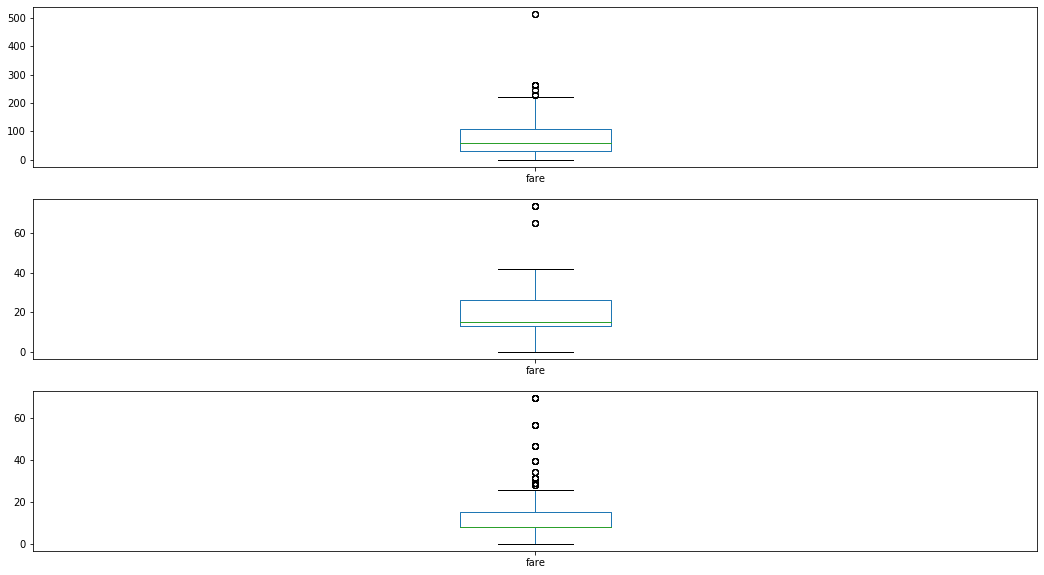

In [88]:
# Display the box plots on 3 separate rows and 1 column
fig, axes = plt.subplots(nrows=3, ncols=1)

# Generate a box plot of the fare prices for the First passenger class
titanic.loc[titanic['pclass'] == 1].plot(ax=axes[0],y='fare', kind='box', figsize=(18, 10))

# Generate a box plot of the fare prices for the Second passenger class
titanic.loc[titanic['pclass'] == 2].plot(ax=axes[1], y='fare', kind='box',figsize=(18, 10))

# Generate a box plot of the fare prices for the Third passenger class
titanic.loc[titanic['pclass'] == 3].plot(ax=axes[2], y='fare', kind='box',figsize=(18, 10))

# Display the plot
plt.show()

Great work! Unsurprisingly, passengers in the first class had the highest fare.